## To do :
###  $\bullet$ Univariate analysis using appropriate features.
###  $\bullet$ Bivariate analysis using appropriate features.


In [1]:
# load the dataset into a pandas dataframe
import pandas as pd
import numpy as np
path = r'Datasets\cleaned_zomato_dataset.csv'

clean_data = pd.read_csv(path)
print(clean_data.shape)


(45584, 26)


### Doing Univariate analysis of the following variables:
#### 1. delivery person age
#### 2. time taken
#### 3. Traffic density

In [2]:
# Get the relevant columns for univariate analysis
delivery_person_age = clean_data['Delivery_person_Age']

delivery_time = clean_data['Time_taken (min)']
#count the number of orders in each traffic density category
num_order_in_traffic_density = pd.DataFrame(
  {
    'low_traffic_count' : clean_data['Road_traffic_density_Low'].sum(),
    'medium_traffic_count' : clean_data['Road_traffic_density_Medium'].sum(),
    'high_traffic_count' : clean_data['Road_traffic_density_Jam'].sum()
  },
  index=[0])


### Distribution , central tendency, Std dev or varince , outliers
### Do univariate analysis on the Delivery person age:
#### Subtasks:
#### $\bullet$ Distribution plotting using histogram.
#### $\bullet$ Central tendency.
#### $\bullet$ Variance.
#### $\bullet$ Outlier analysis.

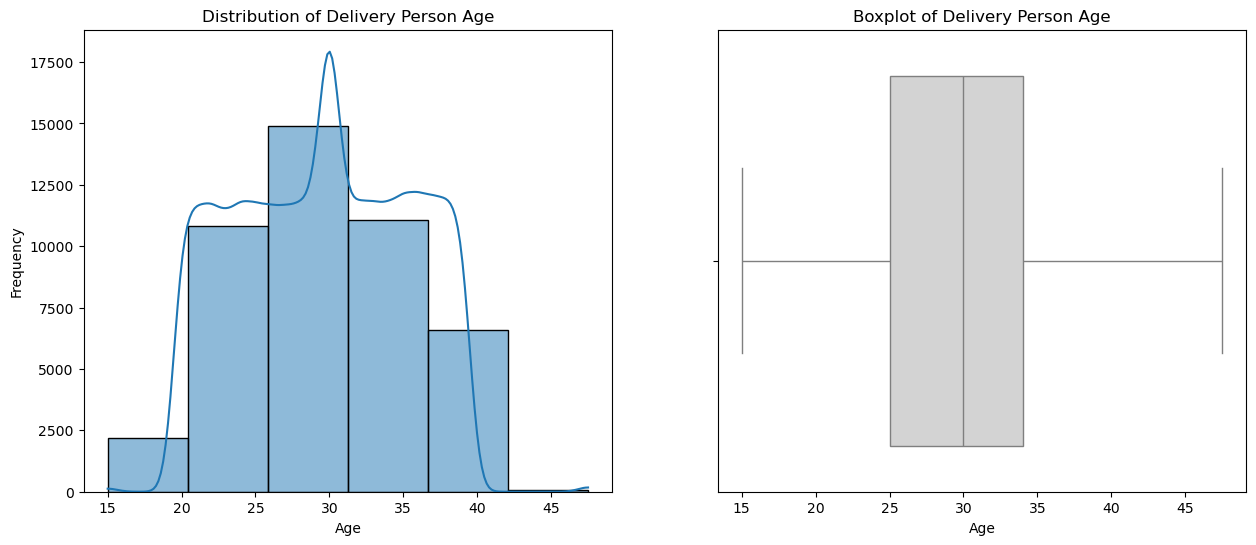

Mean Age: 29.58
Median Age: 30.00
Mode Age: 30.00
Variance of Age: 32.33
IQR of Age: 9.00
Outliers in Age: []


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode,iqr
# plotting the distribution of delivery person age
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(list(delivery_person_age),binwidth=5,kde=True)
plt.title('Distribution of Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.show()
# Boxplot to visualize outliers
plt.subplot(1,2,2)
sns.boxplot(x=delivery_person_age,color='lightgrey')
plt.title('Boxplot of Delivery Person Age')
plt.xlabel('Age')
plt.show()
# Central tendency of delivery person age
mean_age = np.mean(delivery_person_age)
median_age = np.median(delivery_person_age)
mode_age = mode(delivery_person_age,nan_policy='omit')
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age[0]:.2f}")
# Variance and Std Dev of delivery person age
variance_age = np.var(delivery_person_age)
std_dev_age = np.std(delivery_person_age)
print(f"Variance of Age: {variance_age:.2f}")
# Outlier analysis using IQR
iqr_age = iqr(delivery_person_age)
print(f"IQR of Age: {iqr_age:.2f}")
lower_bound_age = np.percentile(delivery_person_age, 25) - 1.5 * iqr_age
upper_bound_age = np.percentile(delivery_person_age, 75) + 1.5 * iqr_age
outliers_age = delivery_person_age[(delivery_person_age < lower_bound_age) | (delivery_person_age > upper_bound_age)]
print(f"Outliers in Age: {outliers_age.values}")

### Univariate analysis for Time Taken (min)
#### Same subtasks as before

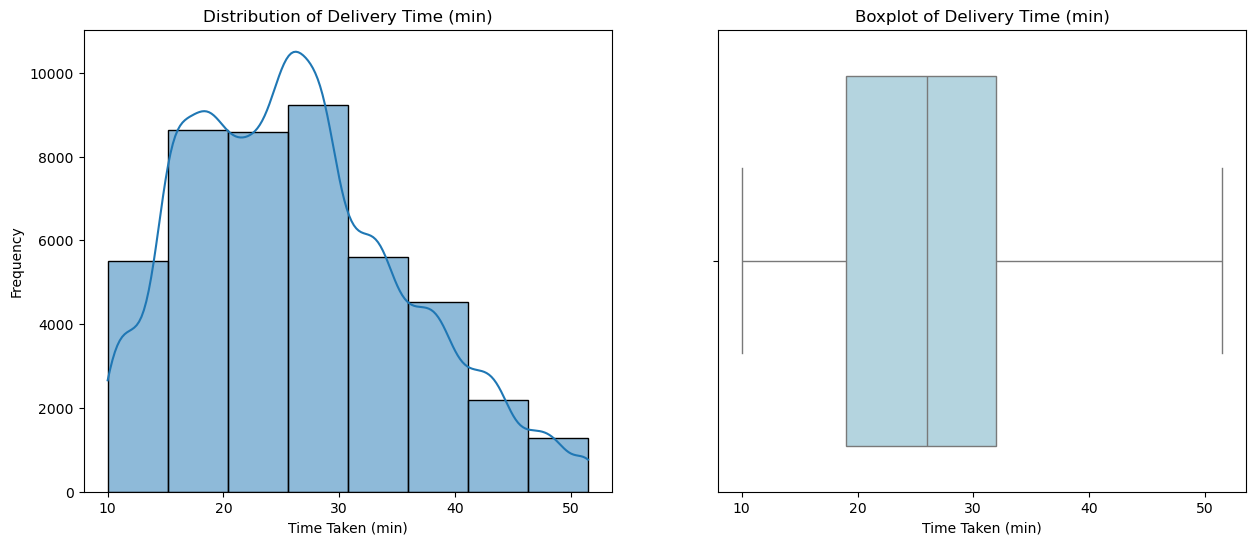

Mean Time Taken: 26.28 min
Median Time Taken: 26.00 min
Mode Time Taken: 26.00 min
Variance of Time Taken: 87.58
IQR of Time Taken: 13.00
Outliers in Time Taken: []


In [4]:
# histogram for delivery time
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(list(delivery_time),binwidth=5,kde=True)
plt.title('Distribution of Delivery Time (min)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
# Boxplot to visualize outliers
plt.subplot(1,2,2)
sns.boxplot(x=delivery_time,color='lightblue')
plt.title('Boxplot of Delivery Time (min)')
plt.xlabel('Time Taken (min)')
plt.show()
# Central tendency of delivery time
mean_time = np.mean(delivery_time)
median_time = np.median(delivery_time)
mode_time = mode(delivery_time,nan_policy='omit')
print(f"Mean Time Taken: {mean_time:.2f} min")
print(f"Median Time Taken: {median_time:.2f} min")
print(f"Mode Time Taken: {mode_time[0]:.2f} min")
# Variance and Std Dev of delivery time
variance_time = np.var(delivery_time)
std_dev_time = np.std(delivery_time)
print(f"Variance of Time Taken: {variance_time:.2f}")
# Outlier analysis using IQR
iqr_time = iqr(delivery_time)
print(f"IQR of Time Taken: {iqr_time:.2f}")
lower_bound_time = np.percentile(delivery_time, 25) - 1.5 * iqr_time
upper_bound_time = np.percentile(delivery_time, 75) + 1.5 * iqr_time
outliers_time = delivery_time[(delivery_time < lower_bound_time) | (delivery_time > upper_bound_time)]
print(f"Outliers in Time Taken: {outliers_time.values}")


### Univariate analysis of the Number of Orders Completed in various Traffic conditions using a visual plot

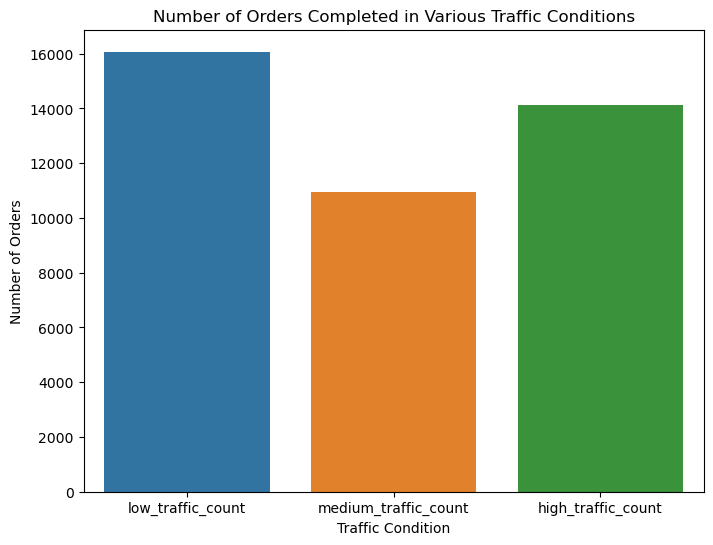

In [5]:
# plot for Orders in various traffic conditions
plt.figure(figsize=(8,6))
sns.barplot(data=num_order_in_traffic_density)
plt.title('Number of Orders Completed in Various Traffic Conditions')
plt.xlabel('Traffic Condition')
plt.ylabel('Number of Orders')
plt.show()

# Bi variate analysis :
## $\bullet$ For Delivery_person_age and Time taken (min)
## $\bullet$ For Weather condition and Time taken(min)

## Sub Task - Observe how the delivery person age affects the Delivery Time and Weather condition affects delivery time
## We are assuming that these two factors have their own Indepent effects 

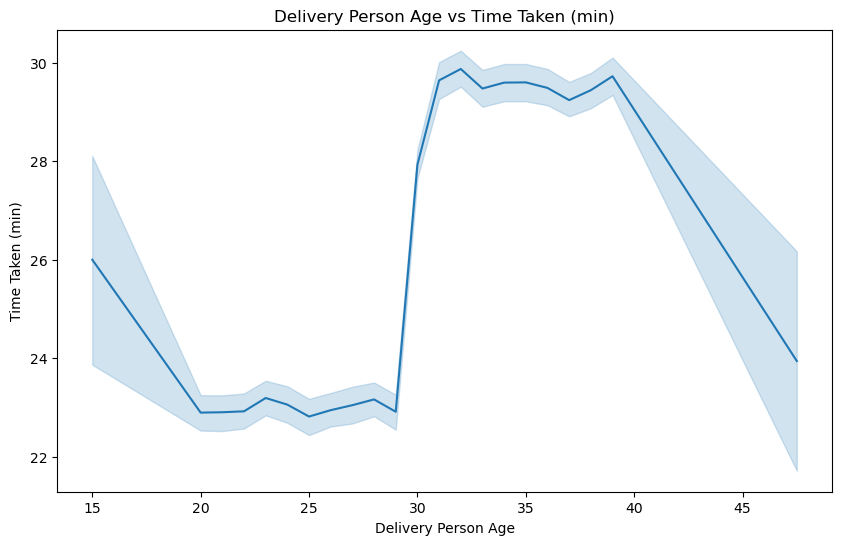

Correlation between Delivery Person Age and Time Taken: 0.29


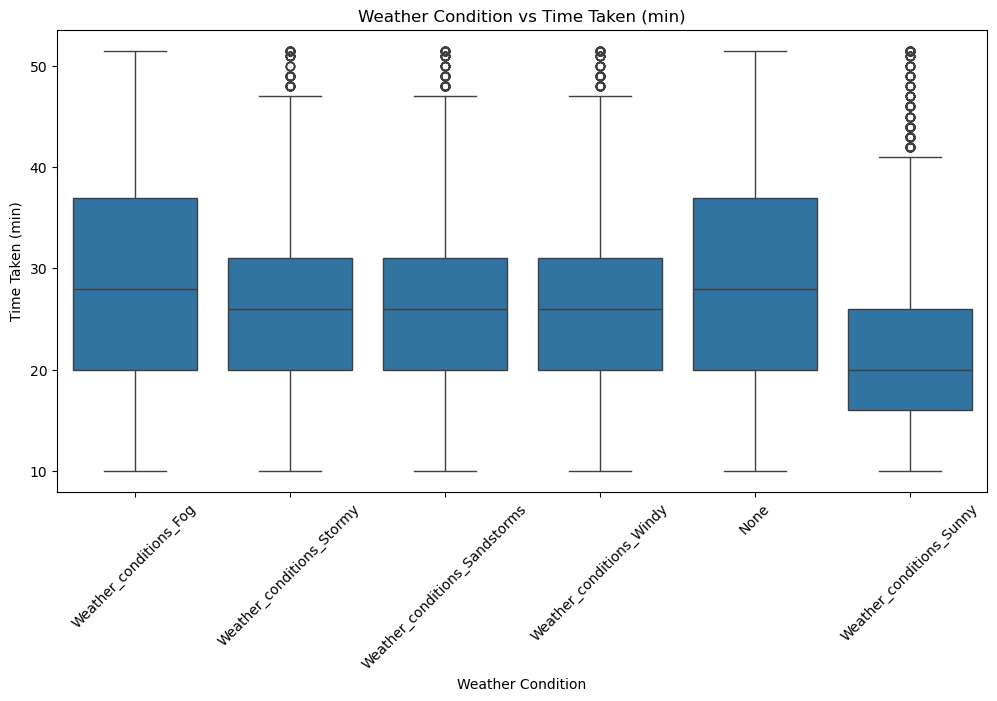

Mean Time Taken in Different Weather Conditions:
               Weather_Condition  Time_taken (min)
0                           None         28.908005
1         Weather_conditions_Fog         28.726448
2  Weather_conditions_Sandstorms         25.869095
3      Weather_conditions_Stormy         25.860298
4       Weather_conditions_Sunny         21.846402
5       Weather_conditions_Windy         26.110348


In [6]:
# gives the proper label for weather conditions instead of one hot encoding
def combine_weather_conditions(row):
    weather_cols = ['Weather_conditions_Fog','Weather_conditions_Sandstorms','Weather_conditions_Stormy','Weather_conditions_Windy','Weather_conditions_Sunny']
    for col in weather_cols:
        if row[col] == 1:
            return col
    return 'None'
clean_data['Weather_Condition'] = clean_data.apply(combine_weather_conditions, axis=1)
# Bivariate analysis for Delivery person age and Time taken (min)
# line plot to see the relationship
plt.figure(figsize=(10,6))
sns.lineplot(x=clean_data['Delivery_person_Age'], y=clean_data['Time_taken (min)'])
plt.title('Delivery Person Age vs Time Taken (min)')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.show()
# Correlation coefficient
correlation_age_time = np.corrcoef(clean_data['Delivery_person_Age'], clean_data['Time_taken (min)'])[0, 1]
print(f"Correlation between Delivery Person Age and Time Taken: {correlation_age_time:.2f}")
# Bivariate analysis for Weather condition and Time taken(min)
# Boxplot to see the distribution of time taken in different weather conditions
plt.figure(figsize=(12,6))
sns.boxplot(x='Weather_Condition', y='Time_taken (min)', data=clean_data)
plt.title('Weather Condition vs Time Taken (min)')
plt.xlabel('Weather Condition')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=45)
plt.show()
# Mean time taken in different weather conditions
mean_time_weather = clean_data.groupby('Weather_Condition')['Time_taken (min)'].mean().reset_index()
print("Mean Time Taken in Different Weather Conditions:")
print(mean_time_weather)


